In [8]:
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('modified_dataset.csv',index_col=0)
train_data

,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Jounrey_date,Jounrey_month,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,1,0,0,0,0,0,0
2,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,1,0,0,0,0,0,0
3,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,0,0,0,0,0,1
4,145,0,3873,9,0,11,25,24,6,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823,160,0,3257,5,55,8,35,21,5,0,...,0,0,0,0,0,0,1,0,0,0
6824,150,0,4107,19,55,22,25,4,9,0,...,0,0,0,1,0,0,0,0,0,0
6825,155,0,4145,20,45,23,20,27,4,1,...,0,0,0,1,0,0,0,0,0,0
6826,160,0,12648,11,30,14,10,3,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X = train_data.drop('Price',axis=1)
y = train_data['Price']

In [4]:
from sklearn.model_selection import cross_val_score, GridSearchCV,KFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import FeatureImportances
from sklearn.preprocessing import MinMaxScaler

kfold = KFold(n_splits=5, random_state=42,shuffle=True)

In [5]:
lr_pipe = make_pipeline(MinMaxScaler(),LinearRegression())

result_r2 = cross_val_score(lr_pipe, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(lr_pipe, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('mse\n',result_rmse,result_rmse.mean())

lr_r2 = result_r2.mean()
lr_rmse = result_rmse.mean()

r2
 [0.61436624 0.5986019  0.59421477 0.56905579 0.6399461 ] 0.6032369600427346
mse
 [-2357.69817571 -2344.88389219 -2551.96903543 -2587.54161383
 -2314.527352  ] -2431.3240138305855


In [6]:
print(lr_pipe)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])


C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


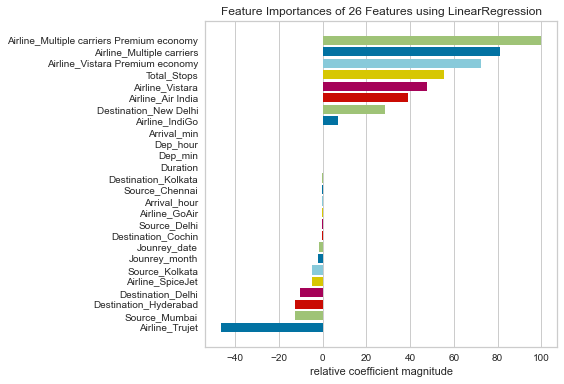

In [7]:
viz = FeatureImportances(lr_pipe['linearregression'])
viz.fit(X, y)
viz.show()

In [9]:
rid_pipe = make_pipeline(MinMaxScaler(),Ridge())

result_r2 = cross_val_score(rid_pipe, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(rid_pipe, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('mse\n',result_rmse,result_rmse.mean())

rid_r2 = result_r2.mean()
rid_rmse = result_rmse.mean()

r2
 [0.61448055 0.59880574 0.59394033 0.56867277 0.63995824] 0.6031715267944329
mse
 [-2357.34870934 -2344.28841519 -2552.83185677 -2588.69125531
 -2314.4883329 ] -2431.529713901868


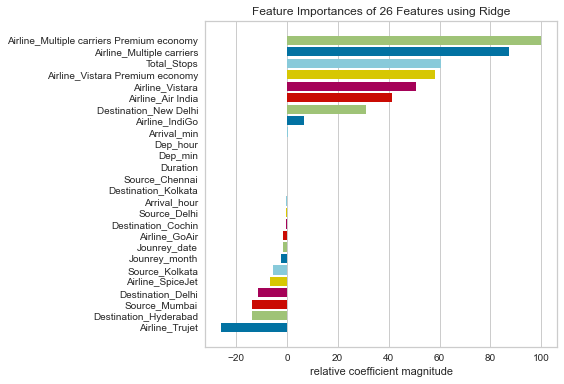

In [10]:
viz = FeatureImportances(rid_pipe['ridge'])
viz.fit(X, y)
viz.show()

In [11]:
svr_pipe = make_pipeline(MinMaxScaler(),SVR(kernel='linear'))

result_r2 = cross_val_score(svr_pipe, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(svr_pipe, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

svr_lin_r2 = result_r2.mean()
svr_lin_rmse = result_rmse.mean()

r2
 [0.21732603 0.23084072 0.1899345  0.15290974 0.21586094] 0.20137438542788963
rmse
 [-3358.8540186  -3245.95002203 -3605.68141919 -3627.78601884
 -3415.66367778] -3450.787031288831


In [12]:
print(svr_pipe)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(kernel='linear'))])


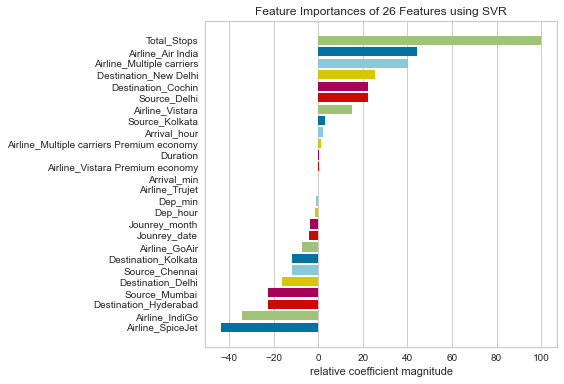

In [13]:
viz = FeatureImportances(svr_pipe['svr'])
viz.fit(X, y)
viz.show()

In [19]:
svr_pipe = make_pipeline(MinMaxScaler(),SVR(kernel='rbf'))

result_r2 = cross_val_score(svr_pipe, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(svr_pipe, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

svr_rbf_r2 = result_r2.mean()
svr_rbf_rmse = result_rmse.mean()

r2
 [0.06874833 0.08141798 0.06085395 0.02798256 0.06283897] 0.06036835808929164
rmse
 [-3663.82074263 -3547.25700941 -3882.34255599 -3886.09887619
 -3734.09762276] -3742.7233613971343


## Random Forest

In [20]:
ran = RandomForestRegressor()


result_r2 = cross_val_score(ran, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_mse = cross_val_score(ran, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_mse,result_mse.mean())

ran_r2 = result_r2.mean()
ran_rmse = result_rmse.mean()

r2
 [0.83460674 0.86190113 0.82899994 0.8383991  0.85962094] 0.8447055694812498
rmse
 [-1542.72325097 -1373.49280569 -1673.74351889 -1610.85857589
 -1482.90785636] -1536.7452015590181


C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


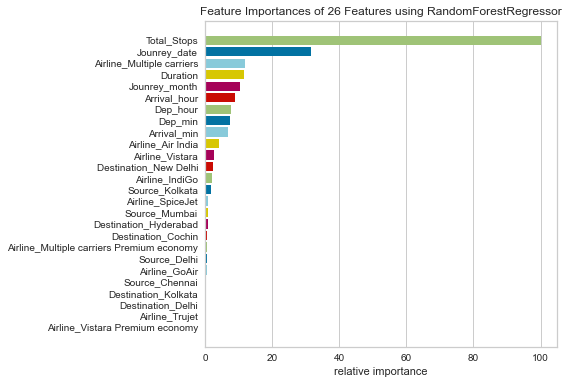

In [11]:
ran = RandomForestRegressor()
viz = FeatureImportances(ran)
viz.fit(X, y)
viz.show()

In [ ]:
parameters = {'n_estimators':np.arange(100,1000,50),
              'min_samples_split':np.arange(10,100),
              'min_samples_leaf':np.arange(1,50),
              'max_features': np.arange(1,30),
              'max_depth':np.arange(20,45)}

model_rf = RandomForestRegressor(random_state=42)
cv = RandomizedSearchCV(model_rf, param_distributions=parameters,
                  cv=kfold,scoring='r2',n_iter=300,n_jobs=-1)

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

n_estimators=140		
min_samples_split = 20		
min_samples_leaf= 1		
max_features = 15		
max_depth=43		

In [ ]:
model_rf = RandomForestRegressor(random_state=42,
                                 n_estimators=cv.best_params_['n_estimators'],
                                 max_features=cv.best_params_['max_features'],\
                                 min_samples_leaf=cv.best_params_['min_samples_leaf'],\
                                 max_depth= cv.best_params_['max_depth'],\
                                 min_samples_split = cv.best_params_['min_samples_split'],\
                                 oob_score=True)

result_r2 = cross_val_score(model_rf, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(model_rf, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_mse,result_mse.mean())

ran_tun_r2 = result_r2.mean()
ran_tun_rmse = result_rmse.mean()

r2 0.8361	

rmse -1560

## LightGBM

In [14]:
lgb = LGBMRegressor()

result_r2 = cross_val_score(lgb, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(lgb, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

lgb_r2 = result_r2.mean()
lgb_rmse = result_rmse.mean()

r2
 [0.8341264  0.85263159 0.83684408 0.81415609 0.86477612] 0.8405068568537251
rmse
 [-1546.28419839 -1420.80959787 -1618.18697182 -1699.22536162
 -1418.42134961] -1540.5854958641028


In [20]:
parameters = {'n_estimators':np.arange(100,1000,50),
              'num_leaves ':np.arange(10,100),
              'max_depth':np.arange(20,45),
             'learning_rate':np.arange(0.001,1,0.002)}

model_lgb = LGBMRegressor(random_state=42,n_jobs=-1)

cv = RandomizedSearchCV(model_lgb, param_distributions=parameters,
                  cv=kfold,scoring='r2',n_iter=300,n_jobs=-1)

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

{'num_leaves ': 53, 'n_estimators': 400, 'max_depth': 38, 'learning_rate': 0.133}
0.8579650969048759
LGBMRegressor(learning_rate=0.133, max_depth=38, n_estimators=400,
              num_leaves =53, random_state=42)


In [15]:
model_lgb = LGBMRegressor(random_state=42,
                                 n_estimators=cv.best_params_['n_estimators'],\
                                 num_leaves=cv.best_params_['num_leaves '],\
                                 max_depth= cv.best_params_['max_depth'],\
                                 learning_rate = cv.best_params_['learning_rate'])

result_r2 = cross_val_score(model_lgb, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(model_lgb, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_mse,result_mse.mean())

lgb_tun_r2 = result_r2.mean()
lgb_tun_rmse = result_rmse.mean()

r2
 [0.8359933  0.86868842 0.84948758 0.82776783 0.86415842] 0.8492191109595824
rmse
 [-1546.28419839 -1420.80959787 -1618.18697182 -1699.22536162
 -1418.42134961] -1540.5854958641028


In [21]:
model_lgb = LGBMRegressor(random_state=42,
                                 n_estimators=cv.best_params_['n_estimators'],\
                                 num_leaves=cv.best_params_['num_leaves '],\
                                 max_depth= cv.best_params_['max_depth'],\
                                 learning_rate = cv.best_params_['learning_rate'])


In [ ]:
viz = FeatureImportances(model_lgb)
viz.fit(X, y)
viz.show()

# XGBOOST

In [21]:
xgb = XGBRegressor()

result_r2 = cross_val_score(xgb, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(xgb, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

xgb_r2 = result_r2.mean()
xgb_rmse = result_rmse.mean()

r2
 [0.84140991 0.87865478 0.84339534 0.84830391 0.88266842] 0.8588864737036012
rmse
 [-1511.95443459 -1289.27340121 -1585.36629287 -1535.19664822
 -1321.25306962] -1448.6087693013235


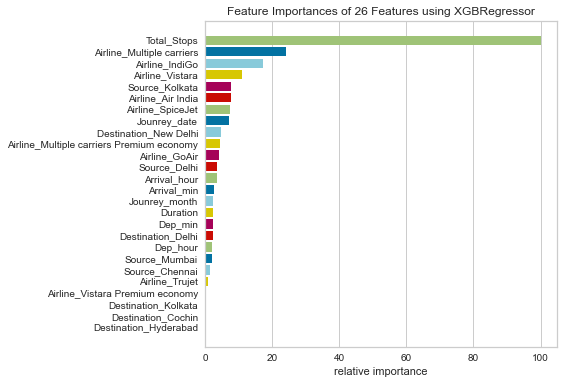

In [16]:
xgb = XGBRegressor()
viz = FeatureImportances(xgb)
viz.fit(X, y)
viz.show()

In [22]:
r_range = [0.1, 0.2,0.25, 0.3,0.35]
n_est_range = [30,50,75,100,120,150]
md_range = [4,6,8,10]

parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=md_range)

from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV
clf = XGBRegressor(random_state=42,tree_method='gpu_hist',gpu_id=0)
cv = GridSearchCV(clf,parameters,
                  cv=5,scoring='r2',n_jobs=-1)

cv.fit(X,y)

print(cv.best_params_)

print(cv.best_score_)

{'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 100}
0.8635339651012288


In [22]:
model_xgb = XGBRegressor(max_depth= 6,\
                   learning_rate =0.25,\
                   n_estimators = 100,\
                  random_state=42)

best params

{'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 100}

0.8635339651012288

In [23]:
model_xgb = XGBRegressor(max_depth= 6,\
                   learning_rate =0.25,\
                   n_estimators = 100,\
                  random_state=42)


result_r2 = cross_val_score(model_xgb, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(model_xgb, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

xgb_tun_r2 = result_r2.mean()
xgb_tun_rmse = result_rmse.mean()

r2
 [0.84229372 0.88071047 0.8529314  0.84502381 0.87935129] 0.8600621355281539
rmse
 [-1507.73557043 -1278.30608805 -1536.33972657 -1551.70555345
 -1339.79978781] -1442.7773452629


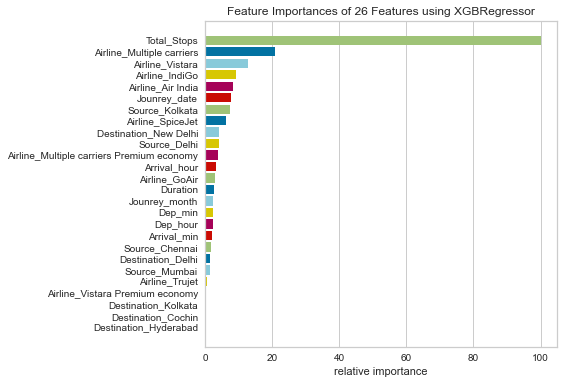

In [17]:
model_xgb = XGBRegressor(max_depth= 6,\
                   learning_rate =0.25,\
                   n_estimators = 100,\
                  random_state=42)

viz = FeatureImportances(model_xgb)
viz.fit(X, y)
viz.show()

In [22]:
from sklearn.ensemble import StackingRegressor

models_considered = [('XGBoost Rgressor', model_xgb),
                     ('Random Forest', ran),
                    ('Light GBM',model_lgb)
                    ]

In [28]:
xgb1 = XGBRegressor(random_state=42,max_depth=6,learning_rate=0.25)

stack = StackingRegressor(estimators = models_considered,
                           final_estimator=xgb1)

result_r2 = cross_val_score(stack, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(stack, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

stack_r2 = result_r2.mean()
stack_rmse = result_rmse.mean()

r2
 [0.82646267 0.85319534 0.79729541 0.81576134 0.85256273] 0.8290555006339823
rmse
 [-1607.33105213 -1398.75318298 -1774.98429923 -1650.42358464
 -1453.6723345 ] -1577.0328906978143


In [29]:
stack_passthrough = StackingRegressor(estimators = models_considered,
                           final_estimator=xgb1,passthrough=True)

result_r2 = cross_val_score(stack_passthrough, X, y, cv=kfold, 
                          scoring='r2',n_jobs=-1)

result_rmse = cross_val_score(stack_passthrough, X, y, cv=kfold, 
                          scoring='neg_root_mean_squared_error',n_jobs=-1)

print('r2\n',result_r2,result_r2.mean())

print('rmse\n',result_rmse,result_rmse.mean())

stack_passthrough_r2 = result_r2.mean()
stack_passthrough_rmse = result_rmse.mean()

r2
 [0.83584513 0.86776857 0.82752626 0.8389956  0.86368636] 0.8467643849245661
rmse
 [-1534.51871488 -1317.10875459 -1698.75282126 -1595.72119449
 -1350.24919728] -1499.2701364976967


In [ ]:
viz = FeatureImportances(lr)
viz.fit(X, y)
viz.show()

 Among all XGBoost Regressor without tuning has given better results